In [1]:
using Revise

In [2]:
using JSON2, PyPlot

In [29]:
using ClimateMARGO

In [30]:
using ClimateMARGO.Models

In [31]:
using ClimateMARGO.Diagnostics

In [32]:
using ClimateMARGO.Utils

In [42]:
dom = Domain(1., 2050., 2020., 2200.)

# Physics
phys = Physics(460., 1.1, 4.97, 1.13, 106, 0.73, 0.5)

# Economics
econ = Economics(
    100.,
    0.02,
    0.02/(3.0)^2,
    0.01,
    8.5,
    0.02, 0.09, 5., 10.,
    0., 0., 0., 0.,
    ramp_emissions(dom), 
    zeros(size(t(dom)))
)

# Controls
cont = Controls(
    zeros(size(t(dom))),
    zeros(size(t(dom))), 
    zeros(size(t(dom))), 
    zeros(size(t(dom)))
)
cont.remove .+= 0.1;
cont.mitigate .+= 0.15;
cont.geoeng .+= 0.075;
cont.adapt .+= 0.05;

# Full model
m = ClimateModel(
    "test",
    dom,
    econ,
    phys,
    cont
);

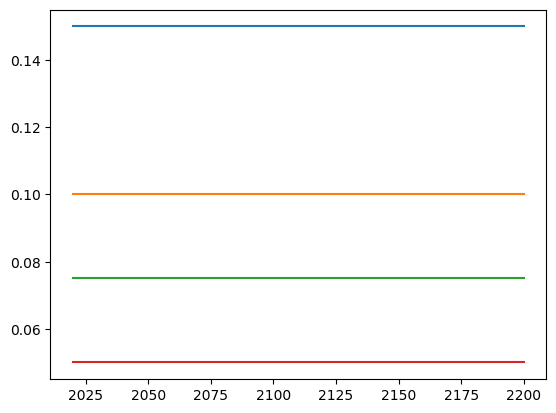

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1602b3fd0>

In [43]:
plot(t(m), cont.mitigate)
plot(t(m), cont.remove)
plot(t(m), cont.geoeng)
plot(t(m), cont.adapt)

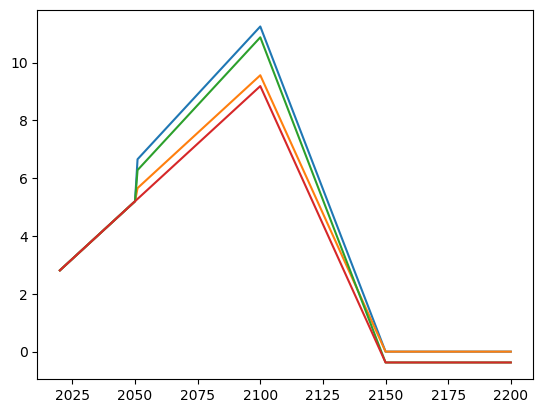

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1610bf4e0>

In [44]:
plot(t(m), effective_emissions(m))
plot(t(m), effective_emissions(m, M=true))
plot(t(m), effective_emissions(m, R=true))
plot(t(m), effective_emissions(m, M=true, R=true))

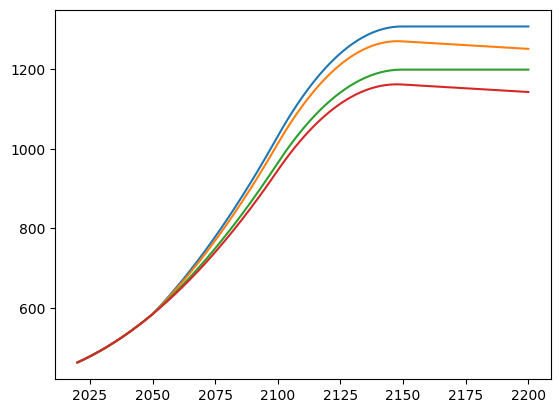

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x161129da0>

In [45]:
plot(t(m), c(m))
plot(t(m), c(m, R=true))
plot(t(m), c(m, M=true))
plot(t(m), c(m, M=true, R=true))

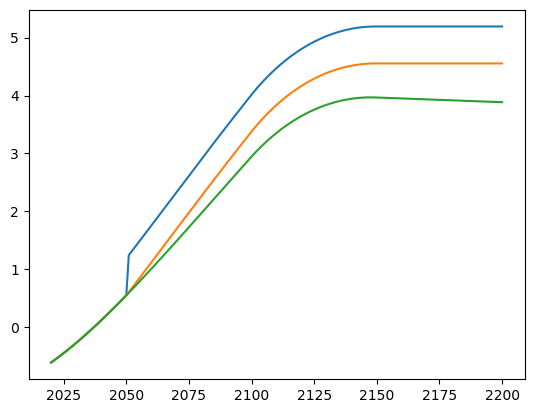

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1613509e8>

In [46]:
plot(t(m), F(m))
plot(t(m), F(m, G=true))
plot(t(m), F(m, G=true, M=true, R=true))

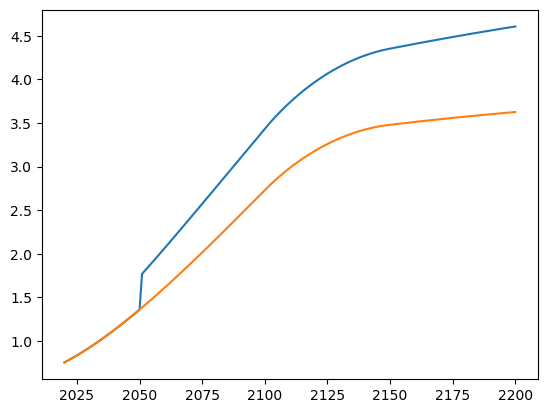

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x161495ac8>

In [47]:
plot(t(m), T(m))
plot(t(m), T(m, M=true, R=true, G=true, A=true))

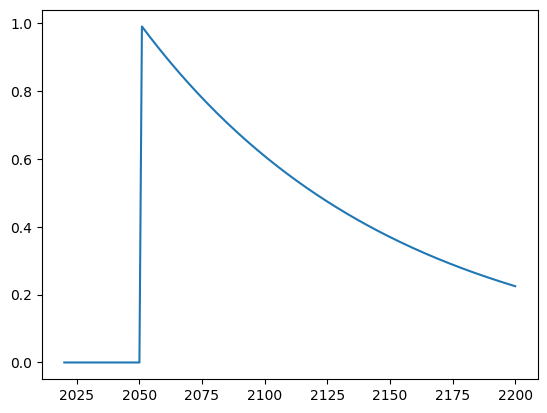

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x161508438>

In [48]:
plot(t(m), discount(m))

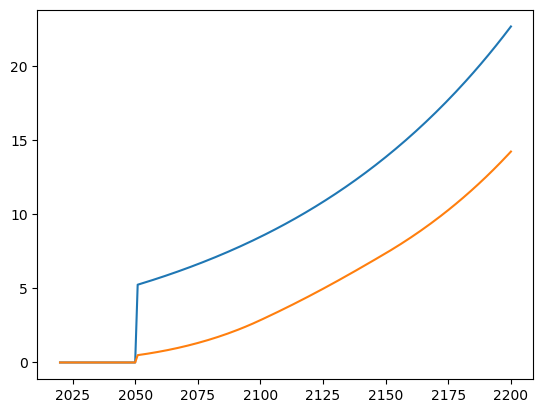

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x16173d6d8>

In [49]:
plot(t(m), cost(m, discounting=true, M=true, R=true, G=true, A=true))
plot(t(m), benefit(m, discounting=true, M=true, R=true, G=true, A=true))

In [50]:
net_present_cost(m, discounting=true, M=true, G=true)

1786.3067616493065

In [93]:
function save(m::ClimateModel; config_path = "../configurations/")
    open("$(config_path)/$(m.name).json","w") do file
        write(file, JSON2.write(m));
    end
end

save (generic function with 1 method)

In [94]:
save(m);

In [95]:
function load(name::String; config_path = "../configurations/")
    open("$(config_path)/$(m.name).json","r") do file
        return JSON2.read(read(file, String), ClimateModel)
    end
end

load (generic function with 2 methods)

In [97]:
m = load("test");